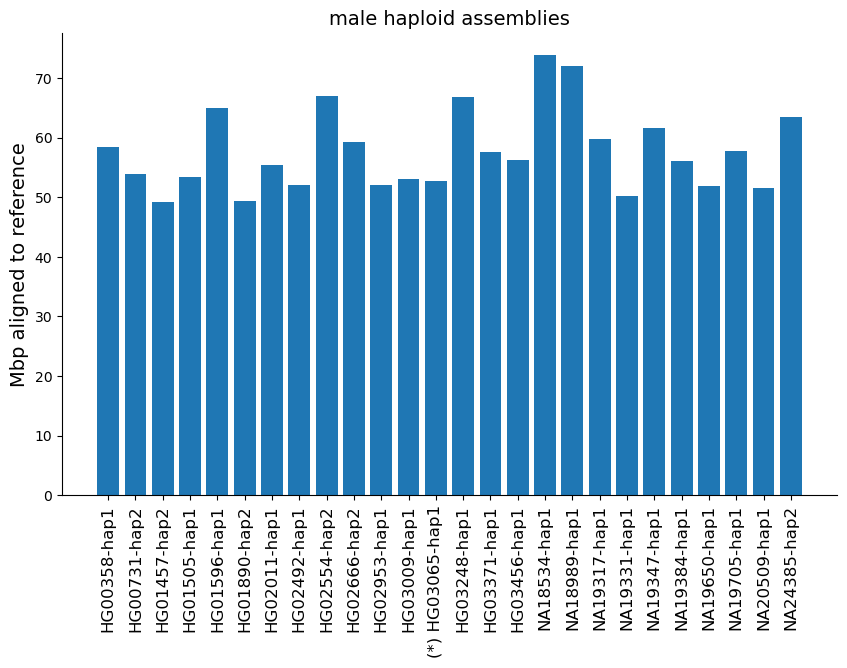

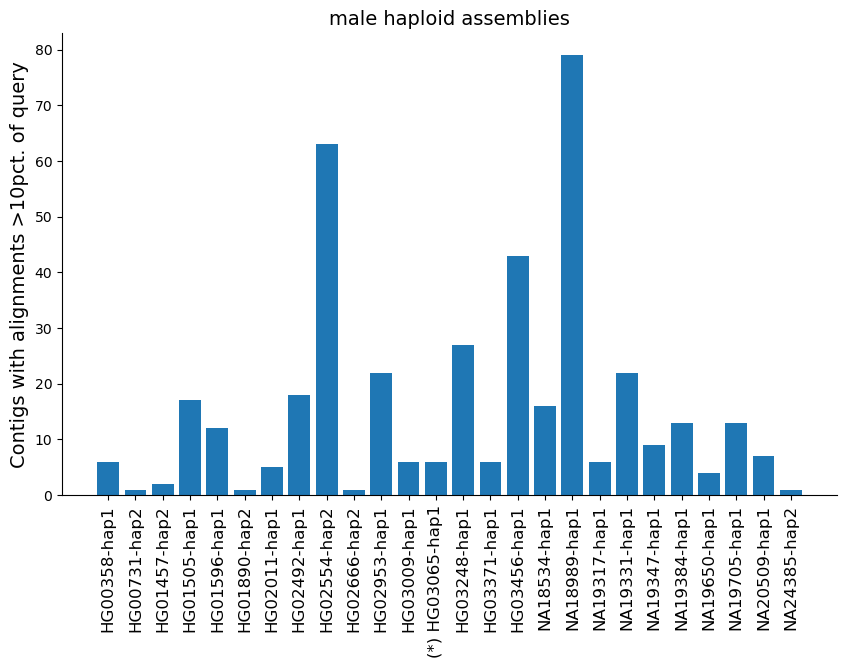

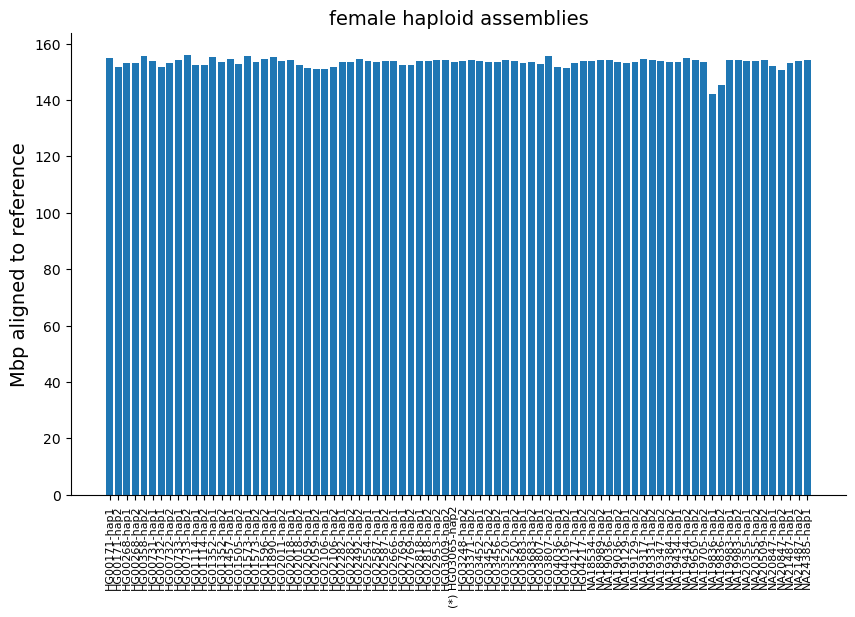

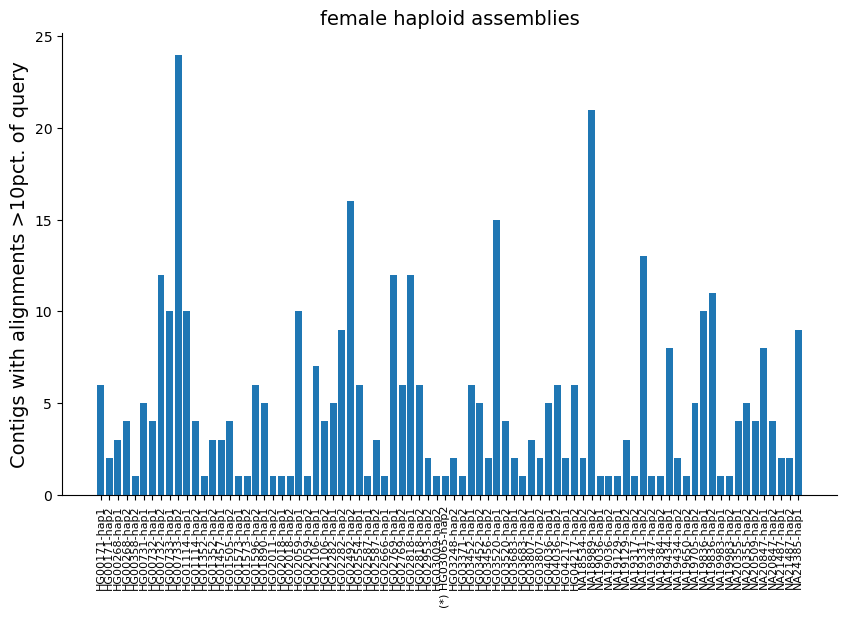

In [23]:
import pathlib as pl
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

karyo_est_file = pl.Path("/home/ebertp/work/projects/hgsvc/2023_karyo_est/vrk_sseq_eval.9c765f81.karyo-est.tsv")

df = pd.read_csv(karyo_est_file, sep="\t", header=0, comment="#")
df.sort_values(["sample", "asm_unit"], inplace=True)

for karyo in ["male", "female"]:
    
    sub = df.loc[df["karyotype"] == karyo, :]
    
    scores = []
    labels = []
    contigs = []
    for row in sub.itertuples():
        sample = row.sample.split(".")[0]
        if "vrk-ps-sseq" not in row.sample:
            continue
        asm = row.asm_unit.split("-")[1]
        label = f"{sample}-{asm}"
        if sample == "HG03065":
            label = "(*) " + label
        labels.append(label)
        if karyo == "male":
            scores.append(row.male_score)
            contigs.append(row.male_contigs)
            labelsize = 12
        else:
            scores.append(row.female_score)
            contigs.append(row.female_contigs)
            labelsize = 8
    scores = [round(s/1e6,2) for s in scores]
            

    fig, ax = plt.subplots(figsize=(10,6))

    x_pos = list(range(1, len(scores)+1))
    ax.bar(
        x_pos,
        height=scores,
        label=labels,
        width=0.8
    )
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, fontsize=labelsize, rotation=90)
    ax.set_ylabel("Mbp aligned to reference", fontsize=14)
    ax.set_title(f"{karyo} haploid assemblies", fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    fig, ax = plt.subplots(figsize=(10,6))

    x_pos = list(range(1, len(scores)+1))
    ax.bar(
        x_pos,
        height=contigs,
        label=labels,
        width=0.8
    )
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, fontsize=labelsize, rotation=90)
    ax.set_ylabel("Contigs with alignments >10pct. of query", fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(f"{karyo} haploid assemblies", fontsize=14)

    